In [1]:
!pip install -q -U "tensorflow-text==2.8.*"
!pip install -q tf-models-official==2.7.0
!pip install transformers
#!pip install focal_loss
#!pip install focal-loss

     |████████████████████████████████| 4.9 MB 4.4 MB/s 
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 116 kB 73.3 MB/s 
     |████████████████████████████████| 99 kB 10.0 MB/s 
     |████████████████████████████████| 352 kB 55.1 MB/s 
     |████████████████████████████████| 596 kB 66.3 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 238 kB 57.4 MB/s 
     |████████████████████████████████| 1.3 MB 51.4 MB/s 
     |████████████████████████████████| 1.1 MB 55.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.2 MB/s 
     |████████████████████████████████| 6.6 MB 42.2 MB/s 
     |████████████████████████████████| 101 kB 3.1 MB/s 


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import sklearn
from sklearn.utils import shuffle

#from focal_loss import SparseCategoricalFocalLoss
import os
import shutil
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer
import keras
tf.get_logger().setLevel('ERROR')

#from nltk.corpus import stopwords  
#from nltk.stem import WordNetLemmatizer
#from nltk.stem import PorterStemmer
#from string import punctuation
#from collections import Counter 
#import wordcloud
#from nltk.corpus import stopwords 
#from textblob import Word 
#import re
#import nltk

In [3]:
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('punkt')

In [12]:
original_train_data = pd.read_csv("/content/original_train_data.csv")
original_test_data = pd.read_csv("/content/original_test_data.csv")

In [13]:
original_test_data = original_test_data[['sentence','maslow']]
original_train_data = original_train_data[['sentence','maslow']]
original_test_data['maslow'] = original_test_data['maslow'].replace(['physiological','love','stability','esteem','spiritual growth'],['basic_needs','basic_needs','basic_needs','advanced_needs','advanced_needs'])
original_train_data['maslow'] = original_train_data['maslow'].replace(['physiological','love','stability','esteem','spiritual growth'],['basic_needs','basic_needs','basic_needs','advanced_needs','advanced_needs'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
original_train_data.head()

,sentence,maslow
0,Melissa never drank wine.Melissa broke up with...,basic_needs
1,Ray couldn't get an irritating tune out of his...,none
2,The family shared a basket of fries.The son at...,basic_needs
3,Poppy started going to dance school.She knew s...,basic_needs
4,Our neighbor Tracy has a boy and a girl in ele...,basic_needs


In [15]:
original_test_data['maslow'] = original_test_data['maslow'].replace(['basic_needs','basic_needs','basic_needs','advanced_needs','advanced_needs','none'],['need','need','need','need','need','no need'])
original_train_data['maslow'] = original_train_data['maslow'].replace(['basic_needs','basic_needs','basic_needs','advanced_needs','advanced_needs','none'],['need','need','need','need','need','no need'])

In [16]:
original_train_data.head(2)

,sentence,maslow
0,Melissa never drank wine.Melissa broke up with...,need
1,Ray couldn't get an irritating tune out of his...,no need


In [17]:
original_test_data.head(2)

,sentence,maslow
0,Jamies job requires her to travel a lot.She ha...,need
1,Andy was craving some cereal.He picked out som...,need


In [18]:
#final_data = final_data[final_data['maslow'] != 'none']
#final_data = final_data[['sentence','maslow']]
#final_none = pd.read_csv('../input/nlpresearch/final_none_orig_french_spanish.csv')
#frames = [final_data, final_none]
#result = pd.concat(frames)

#result = shuffle(result)
#result['maslow'].unique()
#result.head()
#final_data = result.copy()
#final_data[['sentence','maslow']].groupby('maslow').count()
#final_data['maslow'].unique()
#type2 = final_data.copy()
#type2['maslow'] = type2['maslow'].replace(['physiological','love','stability','esteem','spiritual growth'],['basic_needs','basic_needs','basic_needs','advanced_needs','advanced_needs'])
#print(type2['maslow'].unique())
#type2[['sentence','maslow']].groupby('maslow').count()
#final_data[['sentence','maslow']].groupby('maslow').count()
#df2oftype2 = type2.copy()
lb = LabelEncoder() 
original_train_data['maslowLabel'] = lb.fit_transform(original_train_data['maslow'])
original_test_data['maslowLabel'] = lb.fit_transform(original_test_data['maslow'])
print(original_train_data['maslow'].unique())
print(original_train_data['maslowLabel'].unique())
#df2oftype2.info()
#df2oftype2.head()

['need' 'no need']
[0 1]


In [19]:
print(original_test_data['maslow'].unique())
print(original_test_data['maslowLabel'].unique())

['need' 'no need']
[0 1]


In [20]:
original_train_data.head(2)

,sentence,maslow,maslowLabel
0,Melissa never drank wine.Melissa broke up with...,need,0
1,Ray couldn't get an irritating tune out of his...,no need,1


In [21]:
original_train_data[['sentence','maslow']].groupby('maslow').count()

,sentence
maslow,
need,14440
no need,2034


In [22]:
original_test_data.head(10)

,sentence,maslow,maslowLabel
0,Jamies job requires her to travel a lot.She ha...,need,0
1,Andy was craving some cereal.He picked out som...,need,0
2,Karl locked his car.,need,0
3,I was bullied in high school.I had one bully i...,need,0
4,Kay was at work when a headache started.,need,0
5,Kay was taking piano lessons.Her teacher was a...,no need,1
6,Tim was never good with dates.,no need,1
7,Tammy wanted a new puppy.,no need,1
8,"One day, Bob's dog ran out the door as Bob was...",need,0
9,Lily was flying alone for the first time.,need,0


In [23]:
#x_train, x_test, y_train, y_test = train_test_split(df2oftype2['sentence'],df2oftype2['maslowLabel'],test_size = 0.2, random_state = 0, stratify = df2oftype2['maslowLabel'])
x_train_text = original_train_data['sentence']
y_train_text = original_train_data['maslow']
x_test_text = original_test_data['sentence']
y_test_text = original_test_data['maslow']

x_train = original_train_data['sentence']
y_train = original_train_data['maslowLabel']
x_test = original_test_data['sentence']
y_test = original_test_data['maslowLabel']
print(x_train.shape)
print(x_test.shape)
#print(x_val.shape)

(16474,)
(4119,)


In [24]:
y_test_text

0          need
1          need
2          need
3          need
4          need
         ...   
4114       need
4115       need
4116    no need
4117    no need
4118       need
Name: maslow, Length: 4119, dtype: object

In [25]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    1
4117    1
4118    0
Name: maslowLabel, Length: 4119, dtype: int64

In [26]:
unique, counts = np.unique(y_train, return_counts=True)
result = np.column_stack((unique, counts)) 
print (result)

[[    0 14440]
 [    1  2034]]


In [27]:
unique, counts = np.unique(y_test, return_counts=True)
result = np.column_stack((unique, counts)) 
print (result)

[[   0 3610]
 [   1  509]]


In [28]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test =  tf.keras.utils.to_categorical(y_test)
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [29]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [30]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-768_A-12' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

bert_encoder = map_name_to_handle[bert_model_name]
bert_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {bert_encoder}')
print(f'Preprocess model auto-selected: {bert_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [31]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1")

In [ ]:
#!pip install keras-tuner --upgrade
#import keras_tuner

In [32]:
def focal_loss(gamma=2., alpha=4.):   

    gamma = float(gamma)
    alpha = float(alpha)

    def focal_loss_fixed(y_true, y_pred):
        """Focal loss for multi-classification
        FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
        Notice: y_pred is probability after softmax
        gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
        d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
        Focal Loss for Dense Object Detection
        https://arxiv.org/abs/1708.02002

        Arguments:
            y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
            y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

        Keyword Arguments:
            gamma {float} -- (default: {2.0})
            alpha {float} -- (default: {4.0})

        Returns:
            [tensor] -- loss.
        """
        epsilon = 1.e-9
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)

        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.math.log(model_out))
        weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
        fl = tf.multiply(alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)
    return focal_loss_fixed

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.CategoricalCrossentropy(name='categorical_cross_entropy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
      'accuracy'
]

In [33]:

# Note the training variable in the Batch Normalization function. This is required because Batch Normalization operates differently during training vs. the application stage– during training the z score is computed using the batch mean and variance, while in inference, it’s computed using a mean and variance estimated from the entire training set.
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
l = tf.keras.layers.Dropout(0.6, name="dropout1")(outputs['pooled_output'])
l = tf.keras.layers.Dense(units = 128, activation = 'relu', kernel_initializer = 'he_uniform',name = 'layer1')(l)
l = tf.keras.layers.BatchNormalization()(l, training= True)

l = tf.keras.layers.Dropout(0.5, name="dropout2")(l)
l = tf.keras.layers.Dense(units = 128, activation = None, kernel_initializer = 'he_uniform',name = 'layer2')(l)
l = tf.keras.layers.BatchNormalization()(l, training= True)

l = tf.keras.layers.Dropout(0.6, name="dropout3")(l)
l = tf.keras.layers.Dense(units = 128, activation = None, kernel_initializer = 'he_uniform',name = 'layer3')(l)
l = tf.keras.layers.Dense(2, activation='softmax', name="output")(l)
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.compile(loss= focal_loss(alpha=0.1, gamma = 2) , optimizer='adam', metrics=METRICS)

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [35]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,

)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 factor = 0.2,
                                                 patience = 1,
                                                 verbose = 1,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-7,
                                                 mode = 'max')          # Reduce learning rate when a metric has stopped improving.

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
# compile model
model.compile(loss= focal_loss(alpha=0.1, gamma = 2) , optimizer='adam', metrics=METRICS)
history = model.fit(x_train, y_train,epochs=20, verbose=1, validation_data = (x_test,y_test), batch_size  = 8,callbacks=[model_checkpoint_callback,callback, reduce_lr])

Epoch 1/20
2060/2060 [==============================] - 108s 48ms/step - loss: 0.0184 - tp: 13214.0000 - fp: 3260.0000 - tn: 13214.0000 - fn: 3260.0000 - categorical_cross_entropy: 0.5082 - precision: 0.8021 - recall: 0.8021 - auc: 0.8438 - prc: 0.8102 - accuracy: 0.8021 - val_loss: 0.0107 - val_tp: 3598.0000 - val_fp: 521.0000 - val_tn: 3598.0000 - val_fn: 521.0000 - val_categorical_cross_entropy: 0.4532 - val_precision: 0.8735 - val_recall: 0.8735 - val_auc: 0.8900 - val_prc: 0.8668 - val_accuracy: 0.8735 - lr: 0.0010
Epoch 2/20
2060/2060 [==============================] - 100s 49ms/step - loss: 0.0116 - tp: 14096.0000 - fp: 2378.0000 - tn: 14096.0000 - fn: 2378.0000 - categorical_cross_entropy: 0.4829 - precision: 0.8557 - recall: 0.8557 - auc: 0.8787 - prc: 0.8506 - accuracy: 0.8557 - val_loss: 0.0100 - val_tp: 3610.0000 - val_fp: 509.0000 - val_tn: 3610.0000 - val_fn: 509.0000 - val_categorical_cross_entropy: 0.4607 - val_precision: 0.8764 - val_recall: 0.8764 - val_auc: 0.8998 - 

In [36]:
model.load_weights(checkpoint_filepath)
model.evaluate(x_test, y_test)
# 0.1,0.1,0.01

129/129 [==============================] - 19s 148ms/step - loss: 0.0099 - tp: 3601.0000 - fp: 518.0000 - tn: 3601.0000 - fn: 518.0000 - categorical_cross_entropy: 0.4598 - precision: 0.8742 - recall: 0.8742 - auc: 0.9013 - prc: 0.8864 - accuracy: 0.8742


[0.009921510703861713,
 3601.0,
 518.0,
 3601.0,
 518.0,
 0.4598177969455719,
 0.874241292476654,
 0.874241292476654,
 0.9012849926948547,
 0.8863688707351685,
 0.874241292476654]

In [37]:
print(history.history.keys())

dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'categorical_cross_entropy', 'precision', 'recall', 'auc', 'prc', 'accuracy', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_categorical_cross_entropy', 'val_precision', 'val_recall', 'val_auc', 'val_prc', 'val_accuracy', 'lr'])


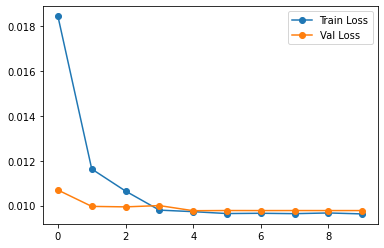

In [38]:
plt.plot(history.history['loss'], '-o', label='Train Loss')
plt.plot(history.history['val_loss'], '-o', label = 'Val Loss')
plt.legend()

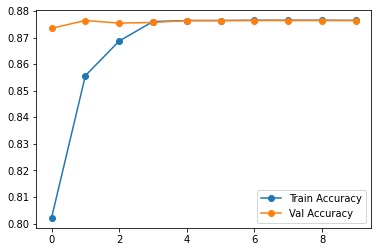

In [39]:
plt.plot(history.history['accuracy'], '-o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'Val Accuracy')
plt.legend()

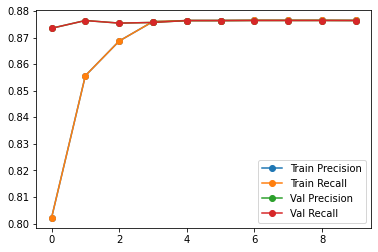

In [40]:
plt.plot(history.history['precision'], '-o', label='Train Precision')
plt.plot(history.history['recall'], '-o', label = 'Train Recall')
plt.plot(history.history['val_precision'], '-o', label='Val Precision')
plt.plot(history.history['val_recall'], '-o', label = 'Val Recall')
plt.legend()

In [41]:
y_pred2 = model.predict(x_test)

In [42]:
y_pred2[2]

array([0.44880497, 0.5511951 ], dtype=float32)

In [43]:
def get_predictions(y_pred2):
    review_predictions2 = []
    for prediction in y_pred2:
        x = prediction
        review_predictions2.append(np.argmax(x))

    review_predictions2 = np.array(review_predictions2)
    review_predictions2.reshape(1,-1)
    print(review_predictions2.shape)
    return review_predictions2

In [44]:
review_predictions2 = get_predictions(y_pred2)

(4119,)


In [45]:
review_predictions2

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
k = pd.DataFrame(review_predictions2, columns = ['Label'])
k.groupby('Label')['Label'].count()

Label
0    4108
1      11
Name: Label, dtype: int64

In [47]:
y_test_text

0          need
1          need
2          need
3          need
4          need
         ...   
4114       need
4115       need
4116    no need
4117    no need
4118       need
Name: maslow, Length: 4119, dtype: object

In [48]:
integer_label = original_test_data['maslowLabel']

In [49]:
integer_label = integer_label.reset_index(drop = True)

In [50]:
integer_label

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    1
4117    1
4118    0
Name: maslowLabel, Length: 4119, dtype: int64

In [51]:
review_predictions2[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [52]:
def make_confusion_matrix(cf,group_names=None,categories='auto',count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [53]:
original_test_data.head()
uniqueClassesMaslowLabel2 = list(original_test_data['maslow'].unique())
uniqueClassesMaslow2 = list(original_test_data['maslowLabel'].unique())
uniqueClassesMaslowLabel2 = ['need','no need']
uniqueClassesMaslow2 = [0,1]
print(uniqueClassesMaslowLabel2)
print(uniqueClassesMaslow2)
print(classification_report(review_predictions2, integer_label,target_names = uniqueClassesMaslowLabel2))

['need', 'no need']
[0, 1]
              precision    recall  f1-score   support

        need       1.00      0.88      0.93      4108
     no need       0.00      0.09      0.00        11

    accuracy                           0.87      4119
   macro avg       0.50      0.48      0.47      4119
weighted avg       0.99      0.87      0.93      4119



In [54]:
review_predictions2

array([0, 0, 1, ..., 0, 0, 0])

[[3600  508]
 [  10    1]]


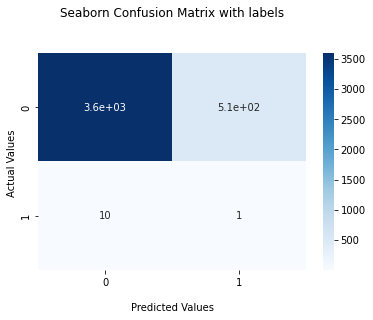

In [55]:
import seaborn as sns
r2 = sklearn.metrics.confusion_matrix(review_predictions2, integer_label)
print(r2)
ax = sns.heatmap(r2, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

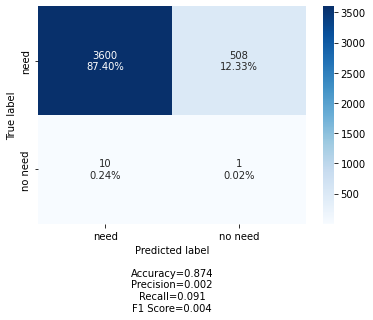

In [56]:
make_confusion_matrix(r2, group_names=uniqueClassesMaslow2, categories=uniqueClassesMaslowLabel2, cmap='Blues')

In [57]:
print(uniqueClassesMaslowLabel2)
print(uniqueClassesMaslow2)

['need', 'no need']
[0, 1]


In [58]:
x_test_text = x_test_text.reset_index(drop = True)
x_test_text[0:5]

0    Jamies job requires her to travel a lot.She ha...
1    Andy was craving some cereal.He picked out som...
2                                 Karl locked his car.
3    I was bullied in high school.I had one bully i...
4             Kay was at work when a headache started.
Name: sentence, dtype: object

In [59]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [60]:
print(uniqueClassesMaslowLabel2)
print(uniqueClassesMaslow2)

['need', 'no need']
[0, 1]


In [63]:
def get_mistakes(prediction_values, actual_values, test_sentences, actual_category, predicted_category,samples_shown):
    # Make sure you Map uniqueClassesMaslowLabell2 catgory with the labels mapping as index. If label is 0 then the category index in the list should be 0
    count = 0
    correct_index = uniqueClassesMaslowLabel2.index(actual_category)
    incorrect_index = uniqueClassesMaslowLabel2.index(predicted_category)
    print('Text classified as ',uniqueClassesMaslowLabel2[incorrect_index]," but actual category is ",uniqueClassesMaslowLabel2[correct_index])
    for i in range(0,len(prediction_values)):
        if prediction_values[i] == incorrect_index and actual_values[i] == correct_index and count != samples_shown:
            print(str(i),test_sentences[i])
            count = count + 1

   
get_mistakes(prediction_values = review_predictions2,
             actual_values = integer_label,
             test_sentences = x_test_text,
             actual_category = 'need', 
             predicted_category = 'no need',
             samples_shown = 10)


Text classified as  no need  but actual category is  need
2 Karl locked his car.
171 A group of thieves broke into the house.
1878 The man printed the document.
1950 The man drove fast.A cop stopped him.
2139 Someone had left a pair of binoculars on the park's bench.
2144 The woman drove down the road.She came to a complete stop.She opened her car door.She threw out her cat.Then the woman drove away.
2308 Maple is having a few drinks.She leaves to get in her car.She drives down the highway drunk.She is pulled over.
2585 My mother gave me the desk that belonged to her grandmother.I kept it in my basement for many years.
2755 Gary strolled casually through the antique shop.
2785 Karl locked his car.He remembered that the keys were still in the car.


In [65]:
get_mistakes(prediction_values = review_predictions2,
             actual_values = integer_label,
             test_sentences = x_test_text,
             actual_category = 'no need', 
             predicted_category = 'need',
             samples_shown = 10)

Text classified as  need  but actual category is  no need
5 Kay was taking piano lessons.Her teacher was an accomplished musician.Kay was working on a piece to perform at the annual recital.She learned a lot from her teacher.
6 Tim was never good with dates.
7 Tammy wanted a new puppy.
22 Joe went to the bank to apply for a loan.
28 LLoyd was out partying one night.He was having a great time.He was also drinking a little too much.
56 Juanita had always wanted to learn how to play the flute.She decided to start taking lessons.At first the flute lessons were very difficult.
59 Kate always recycles.She would crush all her cans.One day she slipped and cut her hand bad.
71 Amy was looking in her cupboards.She didn't have anything to eat.
81 I was walking down the streets of Bombay.I saw a stray dog.I smiled at him and continued walking.The following day, I was walking down the same street.The same stray dog was dead in the middle of the street.
82 Cora wanted to get a new dress.


In [ ]:
review_predictions2
original_test_data
integer_label

In [66]:
original_test_data.head(10)

,sentence,maslow,maslowLabel
0,Jamies job requires her to travel a lot.She ha...,need,0
1,Andy was craving some cereal.He picked out som...,need,0
2,Karl locked his car.,need,0
3,I was bullied in high school.I had one bully i...,need,0
4,Kay was at work when a headache started.,need,0
5,Kay was taking piano lessons.Her teacher was a...,no need,1
6,Tim was never good with dates.,no need,1
7,Tammy wanted a new puppy.,no need,1
8,"One day, Bob's dog ran out the door as Bob was...",need,0
9,Lily was flying alone for the first time.,need,0


In [81]:
review_predictions2[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [82]:
original_test_data['predictions'] = review_predictions2

In [83]:
original_test_data.head(10)

,sentence,maslow,maslowLabel,predictions
0,Jamies job requires her to travel a lot.She ha...,need,0,0
1,Andy was craving some cereal.He picked out som...,need,0,0
2,Karl locked his car.,need,0,1
3,I was bullied in high school.I had one bully i...,need,0,0
4,Kay was at work when a headache started.,need,0,0
5,Kay was taking piano lessons.Her teacher was a...,no need,1,0
6,Tim was never good with dates.,no need,1,0
7,Tammy wanted a new puppy.,no need,1,0
8,"One day, Bob's dog ran out the door as Bob was...",need,0,0
9,Lily was flying alone for the first time.,need,0,0


In [84]:
from google.colab import files
original_test_data.to_csv('original_test_data_with_predictions.csv')
files.download('original_test_data_with_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [92]:
no_need_label = original_test_data[original_test_data['maslow'] == 'no need']

In [89]:
no_need_label.head()

,sentence,maslow,maslowLabel,predictions
5,Kay was taking piano lessons.Her teacher was a...,no need,1,0
6,Tim was never good with dates.,no need,1,0
7,Tammy wanted a new puppy.,no need,1,0
22,Joe went to the bank to apply for a loan.,no need,1,0
28,LLoyd was out partying one night.He was having...,no need,1,0


In [93]:
no_need_label['predictions'] = no_need_label['predictions'].replace([0,1],['need','no need'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
no_need_label.head()

,sentence,maslow,maslowLabel,predictions
5,Kay was taking piano lessons.Her teacher was a...,no need,1,need
6,Tim was never good with dates.,no need,1,need
7,Tammy wanted a new puppy.,no need,1,need
22,Joe went to the bank to apply for a loan.,no need,1,need
28,LLoyd was out partying one night.He was having...,no need,1,need


In [96]:
from google.colab import files
no_need_label.to_excel('test_data_noneed_with_predictions.xlsx')
files.download('test_data_noneed_with_predictions.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
509/4

127.25

In [111]:
t = no_need_label.iloc[383:509][:]
t.to_excel('test_data_noneed_with_predictions_set_4.xlsx')
files.download('test_data_noneed_with_predictions_set_4.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Predicting on Reddit Data

In [116]:
reddit_data = pd.read_csv('Reddit.csv')
reddit_data.columns = ['sentence']
reddit_data.head()

,sentence
0,It feels like everyone else is passing me by a...
1,"Idk why but no matter what I do, life just con..."
2,Recently I have been having obsessive thoughts...
3,He hides it from his friends whom he plays gam...
4,"Hello, I have (22F) struggled with my mental h..."


In [119]:
reddit_data_test = reddit_data['sentence']

In [121]:
y_pred2 = model.predict(reddit_data_test)
y_pred2[2]

array([0.74735355, 0.25264645], dtype=float32)

In [122]:
def get_predictions(y_pred2):
    review_predictions2 = []
    for prediction in y_pred2:
        x = prediction
        review_predictions2.append(np.argmax(x))

    review_predictions2 = np.array(review_predictions2)
    review_predictions2.reshape(1,-1)
    print(review_predictions2.shape)
    return review_predictions2

review_predictions2 = get_predictions(y_pred2)

(49,)


In [124]:
review_predictions2[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [123]:
k = pd.DataFrame(review_predictions2, columns = ['Label'])
k.groupby('Label')['Label'].count()

Label
0    47
1     2
Name: Label, dtype: int64

In [125]:
reddit_data['predictions'] = review_predictions2
reddit_data.head(3)

,sentence,predictions
0,It feels like everyone else is passing me by a...,0
1,"Idk why but no matter what I do, life just con...",1
2,Recently I have been having obsessive thoughts...,0


In [126]:
reddit_data['predictions'] = reddit_data['predictions'].replace([0,1],['need','no need'])

In [127]:
from google.colab import files
reddit_data.to_excel('reddit_data_with_predictions.xlsx')
files.download('reddit_data_with_predictions.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>